In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
df_whole = pd.read_csv('Salary_dataset.csv')
df = df_whole[['YearsExperience', 'Salary']]
print(df.head())

   YearsExperience   Salary
0              1.2  39344.0
1              1.4  46206.0
2              1.6  37732.0
3              2.1  43526.0
4              2.3  39892.0


Text(0, 0.5, 'Salary')

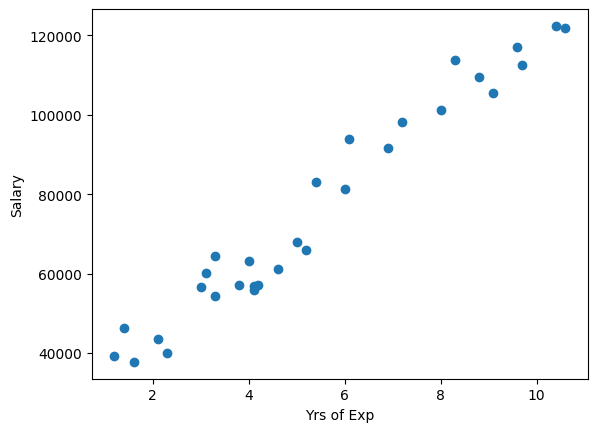

In [3]:
plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel('Yrs of Exp')
plt.ylabel('Salary')

In [4]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


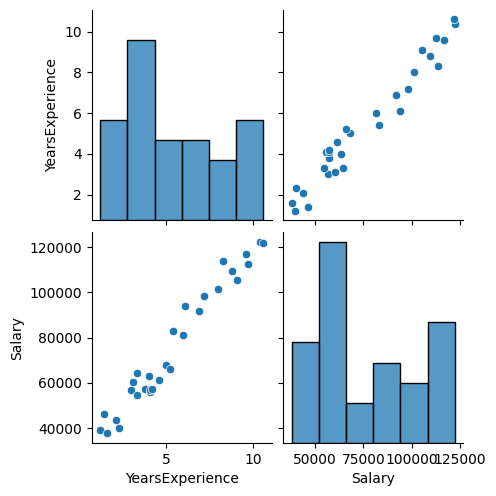

In [5]:
import seaborn as sns
sns.pairplot(df)

In [6]:
# Independent feature should be df or 2D array
x = df[['YearsExperience']]

#  Dependent feature can be series or 1D array
y = df['Salary']

In [7]:
# Train Test Split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.25, random_state=10)


In [8]:
#Standardization
from sklearn.preprocessing import StandardScaler

In [9]:
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)

In [10]:
x_test = scalar.transform(x_test)

In [11]:
# Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression


In [12]:
regression = LinearRegression(n_jobs=-1)

In [13]:
regression.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [14]:
print(f'''
Cofficient = {regression.coef_}
Intercept  = {regression.intercept_}
''')


Cofficient = [26144.43348828]
Intercept  = 78547.36363636365



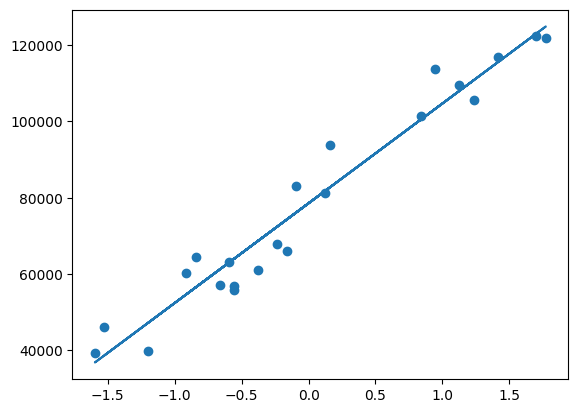

In [15]:
# Plot training data and plot best fit line
plt.scatter(x_train, y_train)
plt.plot(x_train, regression.predict(x_train))

In [16]:
# Predection for test data
y_pred = regression.predict(x_test)

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [18]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

16203974.463930078
3494.434628801717
4025.416060971844


In [19]:
from sklearn.metrics import r2_score

In [20]:
score = r2_score(y_test, y_pred)
print(score)

0.9760442172946988


In [21]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.9720515868438153